# Estudo de Correlação
Objetivo é remover features dos extremos da correlação com o target

In [1]:
import altair as alt
import pandas as pd

from project_ml_course.data_process import filter_columns_by_correlation_threshold

In [2]:
raw_df = pd.read_csv("../data/dados.csv", index_col="Unnamed: 0")

# EDA

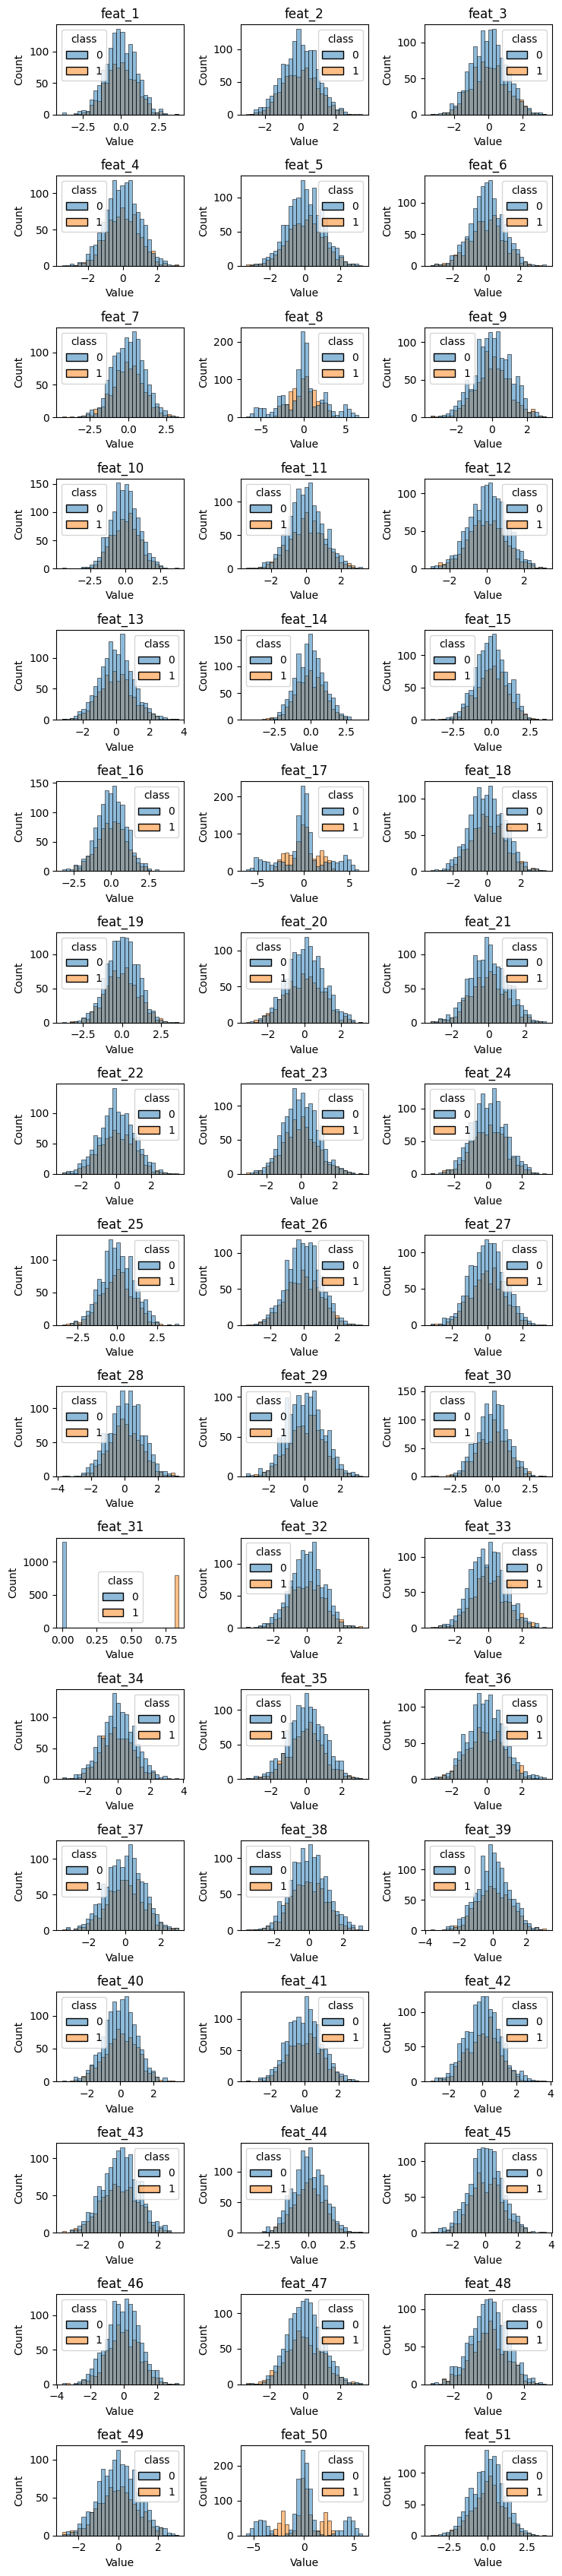

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seleciona apenas colunas numéricas
numeric_columns = (
    raw_df.drop(columns="class").select_dtypes(include="number").columns.tolist()
)

# Define o número de features e o layout do grid
n_features = len(numeric_columns)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(2.5 * n_cols, 2 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(numeric_columns):
    ax = axes[i]
    sns.histplot(data=raw_df, x=feature, bins=30, kde=False, ax=ax, hue="class")
    ax.set_title(feature)
    ax.set_xlabel("Value")
    ax.set_ylabel("Count")

# Remove axes that are not used
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Correlation

## Antes

In [4]:
corr = raw_df.corr(method="pearson")

# Transformar a matriz de correlação em formato "long"
corr_melted = (
    corr.reset_index()
    .melt(id_vars="index")
    .rename(
        columns={"index": "Variable1", "variable": "Variable2", "value": "Correlation"}
    )
)

# Para criar um efeito de máscara (primeiro triângulo), podemos filtrar onde a posição é maior que a outra
corr_melted["Variable1_idx"] = corr_melted["Variable1"].astype("category").cat.codes
corr_melted["Variable2_idx"] = corr_melted["Variable2"].astype("category").cat.codes

# Adiciona uma coluna para o filtro do triângulo superior (como na máscara do seaborn)
corr_melted = corr_melted[corr_melted["Variable1_idx"] > corr_melted["Variable2_idx"]]

# Criar o gráfico de heatmap com Altair
heatmap = (
    alt.Chart(corr_melted)
    .mark_rect()
    .encode(
        x=alt.X("Variable2:N", title=""),
        y=alt.Y("Variable1:N", title=""),
        color=alt.Color(
            "Correlation:Q",
            scale=alt.Scale(scheme="blueorange", domain=[-1, 1]),
            title="Spearman correlation",
        ),
        tooltip=["Variable1", "Variable2", "Correlation"],
    )
    .properties(width=600, height=600)
)

heatmap.show()

alt.Chart(...)

## Depois

In [5]:
corr_filter = filter_columns_by_correlation_threshold(
    ref_col="class",
    method_type="pearson",
    lower_threshold=0.001,
    higher_threshold=0.999,
)


df = raw_df.pipe(corr_filter)

In [6]:
n_antes = len(raw_df.columns)
n_depois = len(df.columns)
removed = list(set(raw_df.columns) - set(df.columns))
print(
    f"N Antes:{n_antes}, N Depois:{n_depois}, Diff:{n_antes - n_depois}, Percertual:{1 - n_depois / n_antes}"
)
print(removed)

corr = raw_df.corr(method="pearson")
print(corr.loc[removed, "class"].to_markdown())

N Antes:52, N Depois:47, Diff:5, Percertual:0.09615384615384615
['feat_24', 'feat_31', 'feat_14', 'feat_27', 'feat_23']
|         |        class |
|:--------|-------------:|
| feat_24 |  0.000400526 |
| feat_31 |  1           |
| feat_14 |  0.000856701 |
| feat_27 | -0.000502959 |
| feat_23 |  0.000391264 |


In [7]:
corr = df.corr(method="pearson")

# Transformar a matriz de correlação em formato "long"
corr_melted = (
    corr.reset_index()
    .melt(id_vars="index")
    .rename(
        columns={"index": "Variable1", "variable": "Variable2", "value": "Correlation"}
    )
)

# Para criar um efeito de máscara (primeiro triângulo), podemos filtrar onde a posição é maior que a outra
corr_melted["Variable1_idx"] = corr_melted["Variable1"].astype("category").cat.codes
corr_melted["Variable2_idx"] = corr_melted["Variable2"].astype("category").cat.codes

# Adiciona uma coluna para o filtro do triângulo superior (como na máscara do seaborn)
corr_melted = corr_melted[corr_melted["Variable1_idx"] > corr_melted["Variable2_idx"]]

# Criar o gráfico de heatmap com Altair
heatmap = (
    alt.Chart(corr_melted)
    .mark_rect()
    .encode(
        x=alt.X("Variable2:N", title=""),
        y=alt.Y("Variable1:N", title=""),
        color=alt.Color(
            "Correlation:Q",
            scale=alt.Scale(scheme="blueorange", domain=[-1, 1]),
            title="Spearman correlation",
        ),
        tooltip=["Variable1", "Variable2", "Correlation"],
    )
    .properties(width=600, height=600)
)

heatmap.show()

alt.Chart(...)